In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/smoking_driking_dataset_Ver01.csv")

# **About Dataset**

### **What is the size of data?**

In [ ]:
df.shape

(991346, 24)

### **How does the data look like?**

In [ ]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


### **What are the datatypes of columns?**

In [ ]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

The columns Sex and DRK_YN are of object datatype , so we will have to convert it to numerical type.

### **Does the data contain missing values?**

In [ ]:
print(df.isnull().sum())

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


There are no missing values in the data.

### **What are the number of unique values in each column?**

In [ ]:
df.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

### **Are there any duplicates?**

In [ ]:
df.duplicated().sum()

26

There are 26 duplicate rows  , so we will have to remove it.

### **How does the data look like mathematically?**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


# **EDA**

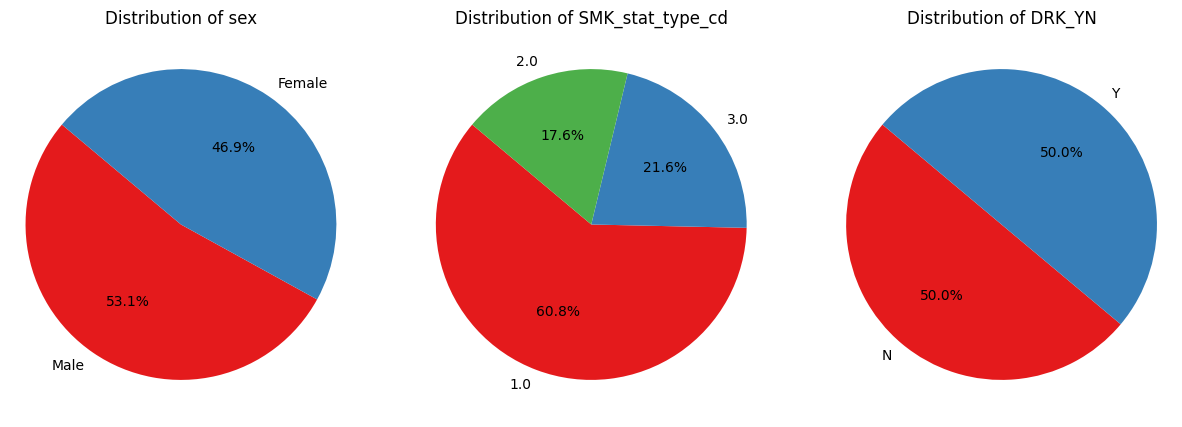

In [ ]:
cols = ['sex','SMK_stat_type_cd', 'DRK_YN']

custom_palette = "Set1"
sns.set_palette(custom_palette)

fig, axes = plt.subplots(1, len(cols), figsize=(15, 5))

for i, column in enumerate(cols):
    category_counts = df[column].value_counts()
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].axis('equal')
    axes[i].set_title(f'Distribution of {column}')

plt.show()

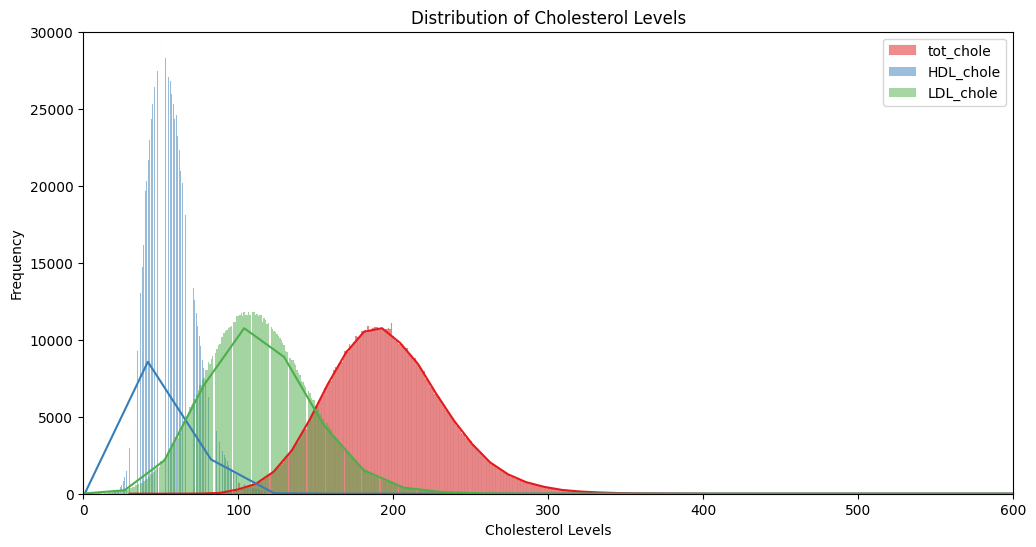

In [ ]:
cholesterol_columns = ['tot_chole', 'HDL_chole', 'LDL_chole']

plt.figure(figsize=(12, 6))
for col in cholesterol_columns:
    sns.histplot(df[col], kde=True, label=col)

plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.legend()

plt.xlim(0, 600)
plt.ylim(0, 30000)

plt.show()

### **SBP and DBP by age**

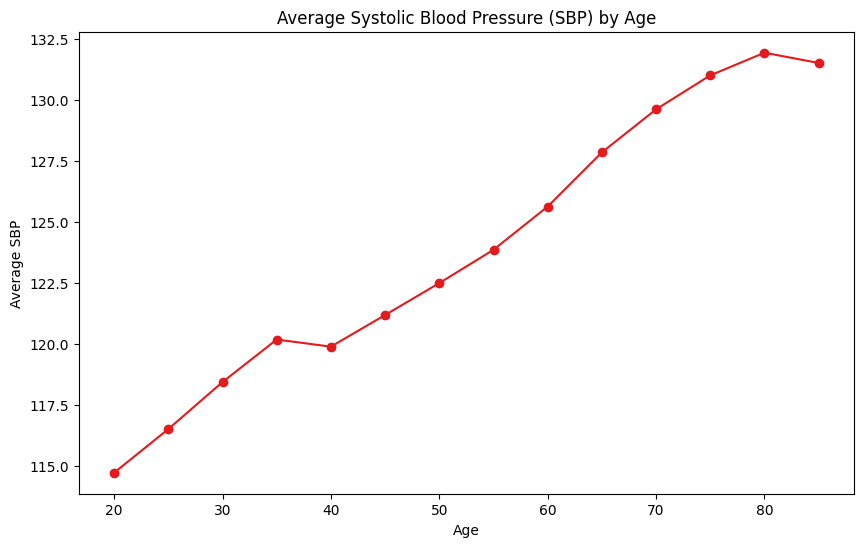

In [ ]:
average_sbp_by_age = df.groupby('age')['SBP'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_sbp_by_age['age'], average_sbp_by_age['SBP'], marker='o')
plt.title('Average Systolic Blood Pressure (SBP) by Age')
plt.xlabel('Age')
plt.ylabel('Average SBP')
plt.show()

SBP is the pressure in the arteries when the heart beats. We can notice here that the SBP increases with a person gets old i.e. the pressure in arteries increases with age.

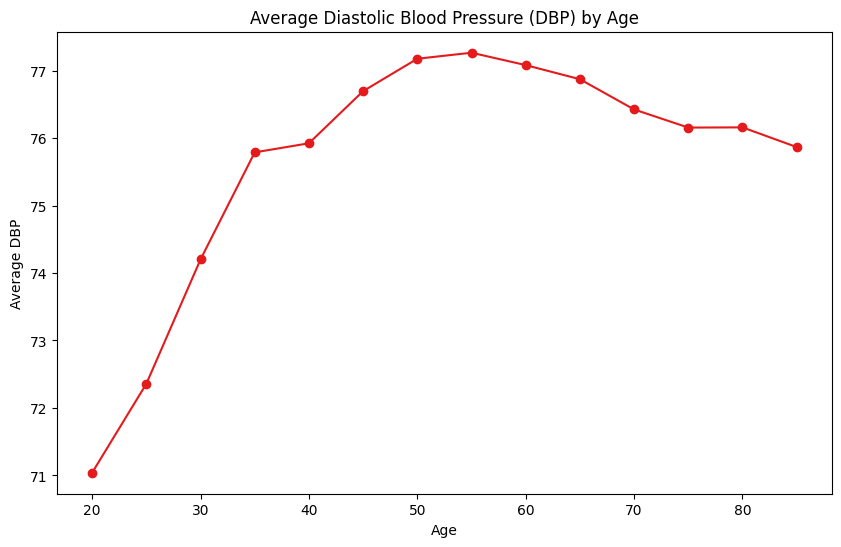

In [ ]:
average_dbp_by_age = df.groupby('age')['DBP'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_sbp_by_age['age'], average_dbp_by_age['DBP'], marker='o')
plt.title('Average Diastolic Blood Pressure (DBP) by Age')
plt.xlabel('Age')
plt.ylabel('Average DBP')
plt.show()

DBP is pressure in the arteries between heartbeats. DBP is the highest when a person is in his 50s.

## **Gender-wise Analysis**

### **Comparison of SBP and DBP by gender**

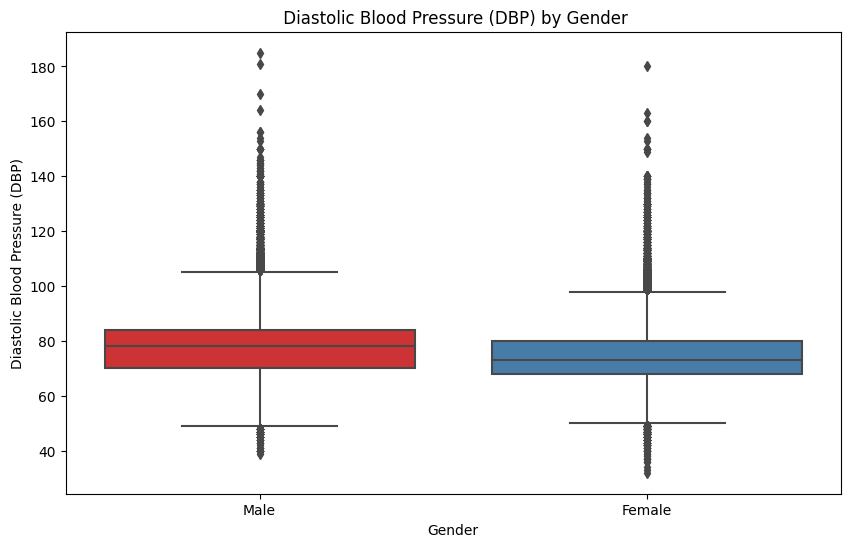

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='DBP', data=df)
plt.title(' Diastolic Blood Pressure (DBP) by Gender')
plt.xlabel('Gender')
plt.ylabel('Diastolic Blood Pressure (DBP)')
plt.show()

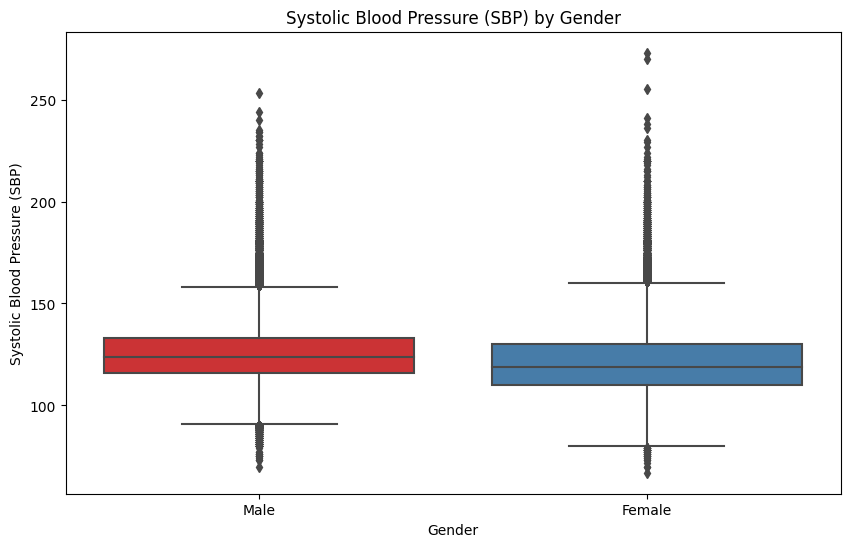

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='SBP', data=df)
plt.title('Systolic Blood Pressure (SBP) by Gender')
plt.xlabel('Gender')
plt.ylabel('Systolic Blood Pressure (SBP)')
plt.show()

The range of SBP and DBP levels is compartively higher in males.

### **Comparison of Body Measurements by Gender**

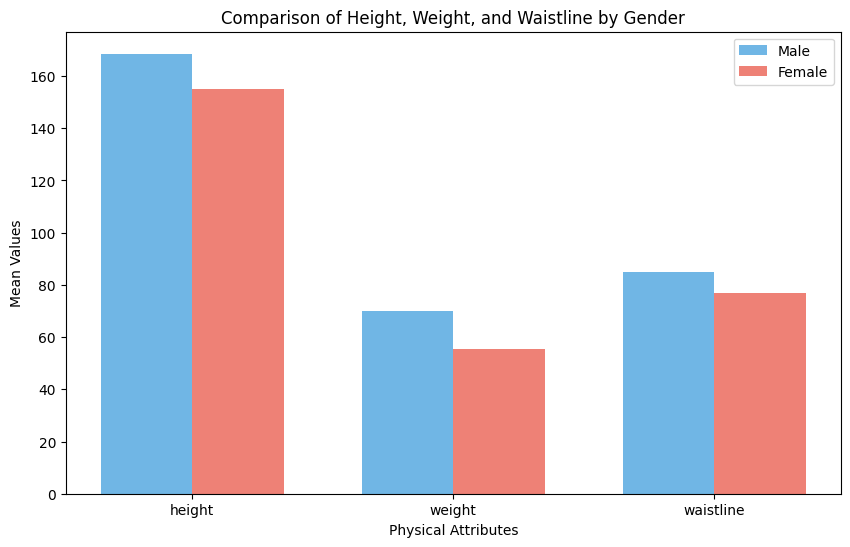

In [ ]:
grouped_data = df.groupby('sex')[['height', 'weight', 'waistline']].mean().reset_index()

attributes = ['height', 'weight', 'waistline']
male_values = grouped_data[grouped_data['sex'] == 'Male'][attributes].values[0]
female_values = grouped_data[grouped_data['sex'] == 'Female'][attributes].values[0]

bar_positions = range(len(attributes))

bar_width = 0.35

colors = ['#3498db', '#e74c3c']

plt.figure(figsize=(10, 6))
plt.bar(bar_positions, male_values, bar_width, label='Male', alpha=0.7, color=colors[0])
plt.bar([pos + bar_width for pos in bar_positions], female_values, bar_width, label='Female', alpha=0.7, color=colors[1])

plt.xticks([pos + bar_width / 2 for pos in bar_positions], attributes)

plt.xlabel('Physical Attributes')
plt.ylabel('Mean Values')
plt.title('Comparison of Height, Weight, and Waistline by Gender')
plt.legend()
plt.show()

We can notice that all the body measurements of males is higher than females.

### **Comparison of Hemoglobin Levels by Gender**

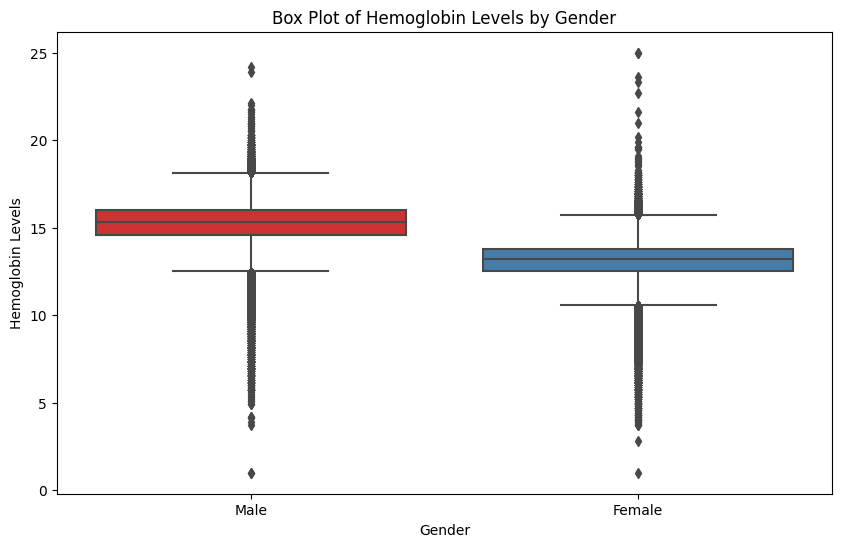

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='hemoglobin', data=df)
plt.title('Box Plot of Hemoglobin Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Hemoglobin Levels')
plt.show()

Hameglobin levels are higher for males than females and most of the males have hameglobin count more than 15.

### **Distribution of Drinking Status by Gender**

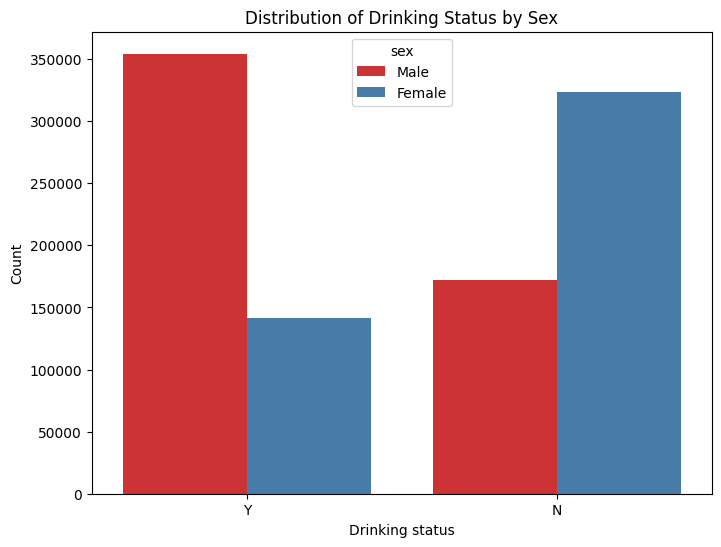

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DRK_YN', hue='sex', palette='Set1')
plt.xlabel('Drinking status')
plt.ylabel('Count')
plt.title('Distribution of Drinking Status by Sex')
plt.show()

The proportion of males in the drinkers category is very high compared to that of females.

### **Distribution of Smoking Status by Gender**

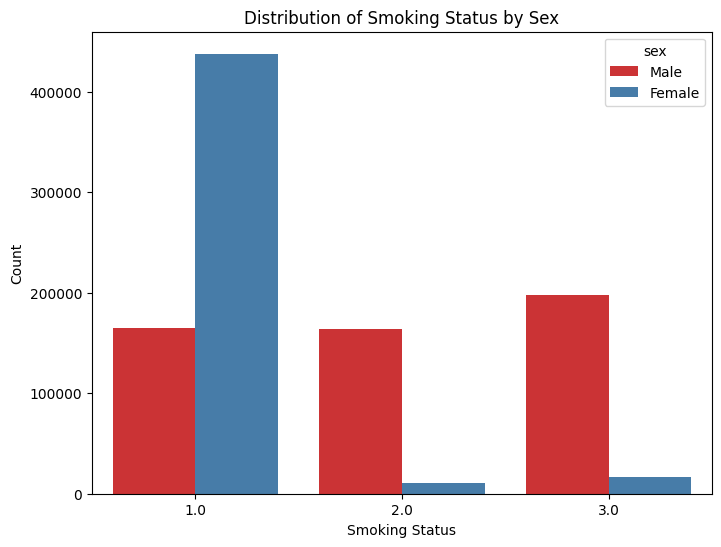

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SMK_stat_type_cd', hue='sex', palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Distribution of Smoking Status by Sex')
plt.show()

We can observe that


*   Females do not prefer smoking.
*   More number of males used to smoke or still smoke.



## **Smoking Status Distribution by Drinking status**

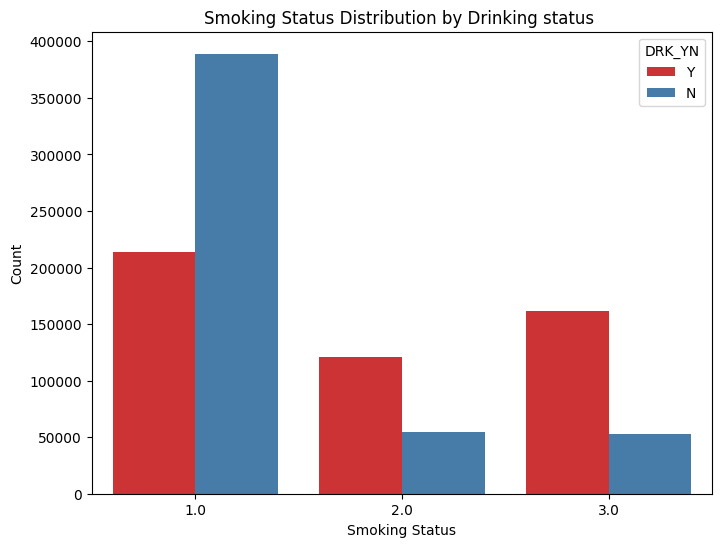

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SMK_stat_type_cd', hue='DRK_YN', palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status Distribution by Drinking status ')
plt.show()

We can observe that people who drink tend to smoke also ( by observing 2nd and 3rd categories ).



## **Gender and Age Distribution**

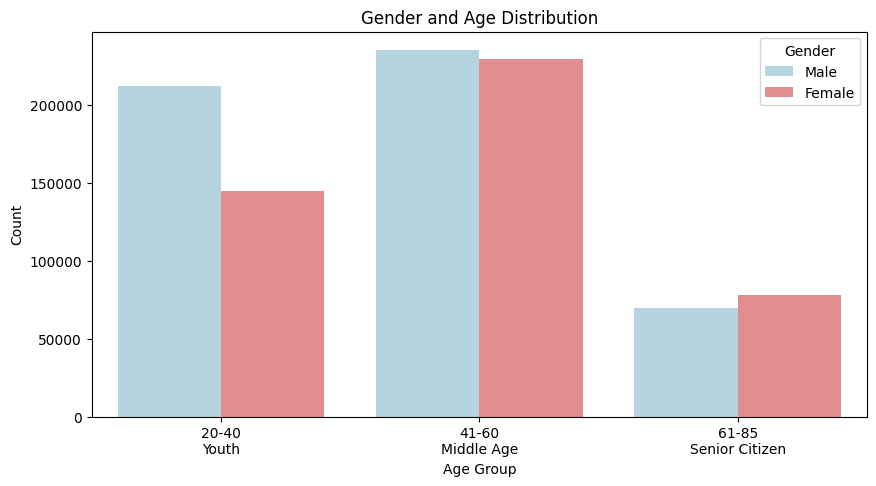

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[20, 40, 60, 85], labels=['Youth', 'Middle Age', 'Senior Citizen'])

plt.figure(figsize=(10, 5))
colors = ['lightblue', 'lightcoral']
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(data=df, x='age_group', hue='sex')
age_range_labels = ['20-40', '41-60', '61-85']
ax.set_xticklabels([f'{label}\n{age}' for label, age in zip(age_range_labels, df['age_group'].cat.categories)])

plt.title('Gender and Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])

plt.show()

We can say that females tend to live longer as the number of females in senior citizen category is relatively more.

## **Analyzing Different Factors Across Smoking and Drinking Groups**

### **Age Distribution by Smoking Status**

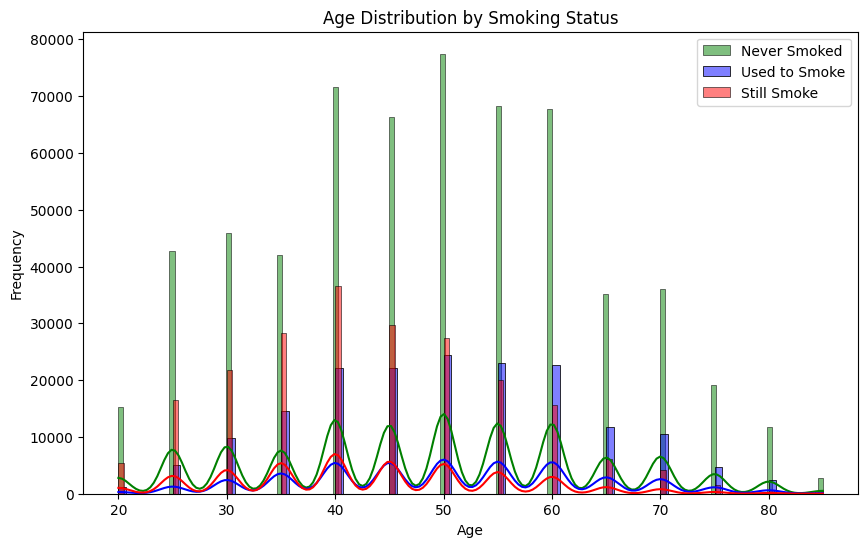

In [ ]:
never_smoked = df[df['SMK_stat_type_cd'] == 1]
used_to_smoke = df[df['SMK_stat_type_cd'] == 2]
still_smoke = df[df['SMK_stat_type_cd'] == 3]

plt.figure(figsize=(10, 6))
sns.histplot(never_smoked['age'], color='green', label='Never Smoked', alpha=0.5, kde=True)
sns.histplot(used_to_smoke['age'], color='blue', label='Used to Smoke', alpha=0.5, kde=True)
sns.histplot(still_smoke['age'], color='red', label='Still Smoke', alpha=0.5, kde=True)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Smoking Status')
plt.legend()
plt.show()

We can see, that in the age group between 20-50, the number of smokers are significantly increasing. After that, the number of people who smoke significantly decreases.

### **Age Distribution by Drinking Status**

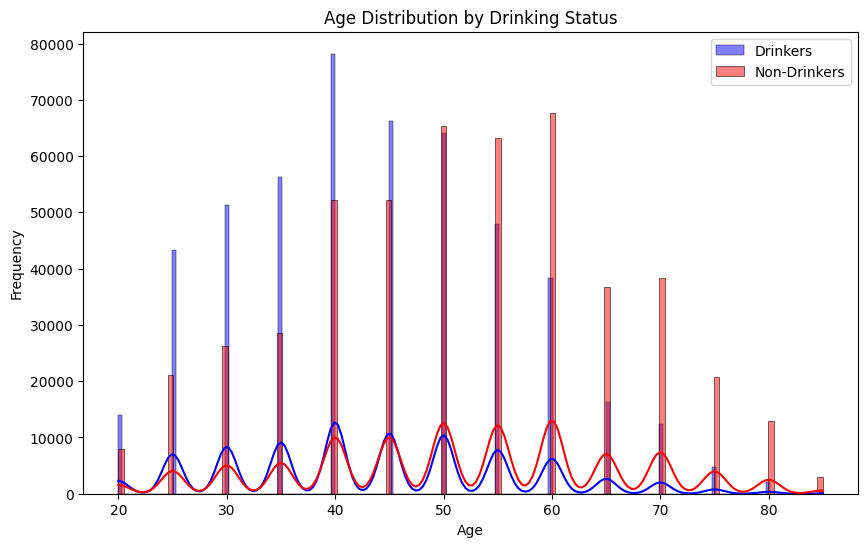

In [ ]:
plt.figure(figsize=(10, 6))

drinkers = df[df['DRK_YN'] == 'Y']
non_drinkers = df[df['DRK_YN'] == 'N']

sns.histplot(drinkers['age'], color='blue', label='Drinkers', alpha=0.5, kde=True)
sns.histplot(non_drinkers['age'], color='red', label='Non-Drinkers', alpha=0.5, kde=True)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Drinking Status')
plt.legend()
plt.show()

We can see, that in the age group between 20-50, the number of drinkers are significantly increasing, and then decreasing in the later part of the plot. As most of the drinkers start quitting alcohol completely after their 50s.

### **Height Comparison by Smoking Status**

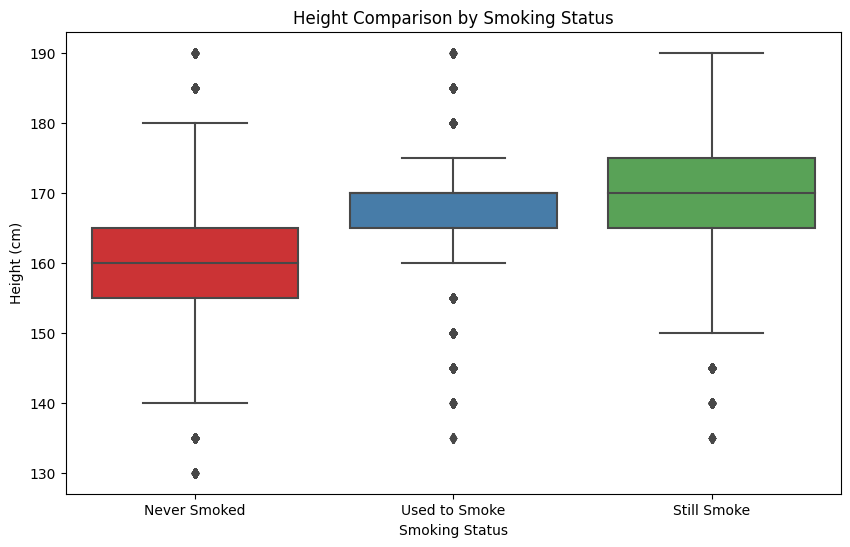

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SMK_stat_type_cd', y='height', data=df, palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('Height (cm)')
plt.title('Height Comparison by Smoking Status')
plt.xticks(ticks=[0, 1, 2], labels=['Never Smoked', 'Used to Smoke', 'Still Smoke'])
plt.show()

We can say that there is strong correlation between person's height and smoking status. The height of people who never smoke is compartively very small.

### **Height Comparison by Drinking Status**

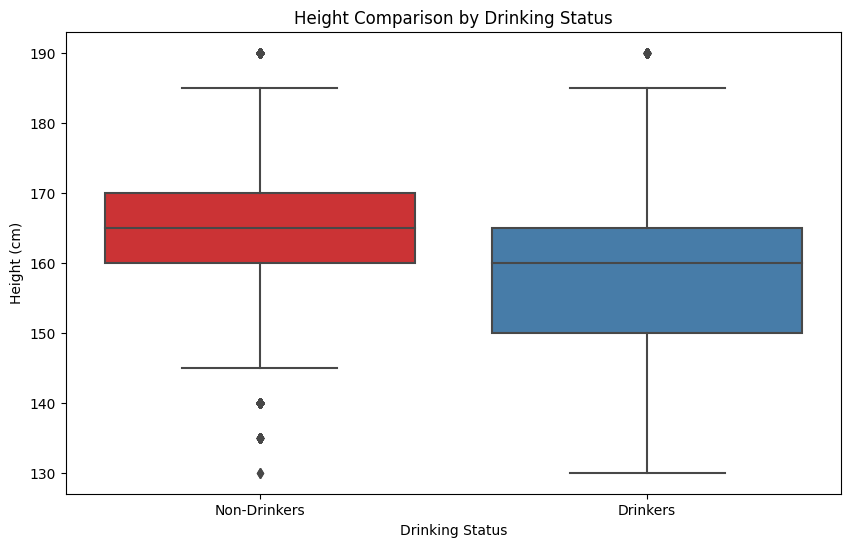

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DRK_YN', y='height', data=df, palette='Set1')
plt.xlabel('Drinking Status')
plt.ylabel('Height (cm)')
plt.title('Height Comparison by Drinking Status')
plt.xticks(ticks=[0, 1], labels=['Non-Drinkers', 'Drinkers'])
plt.show()

We can say that there is no correlation between person's height and drinking status.

### **Weight Distribution by Smoking Status**

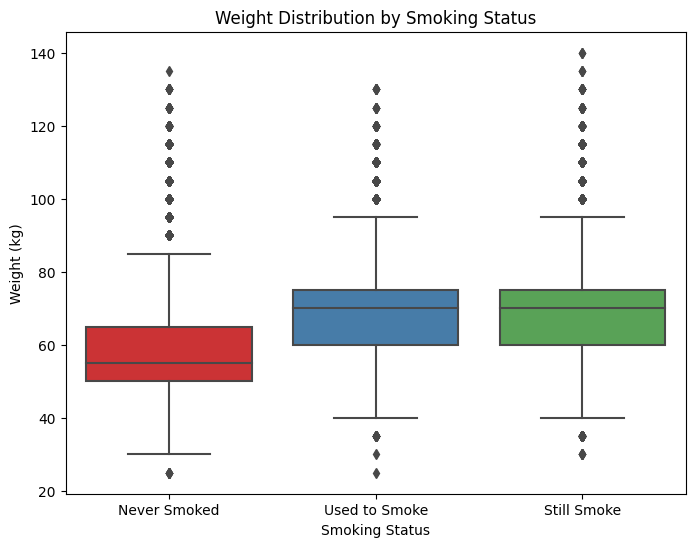

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SMK_stat_type_cd', y='weight', palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('Weight (kg)')
plt.title('Weight Distribution by Smoking Status')
plt.xticks(ticks=[0, 1, 2], labels=['Never Smoked', 'Used to Smoke', 'Still Smoke'])
plt.show()

We can say that there is some correlation between person's weight and smoking status. The people who have never smoked weigh less than others.

### **Weight Distribution by Drinking Status**

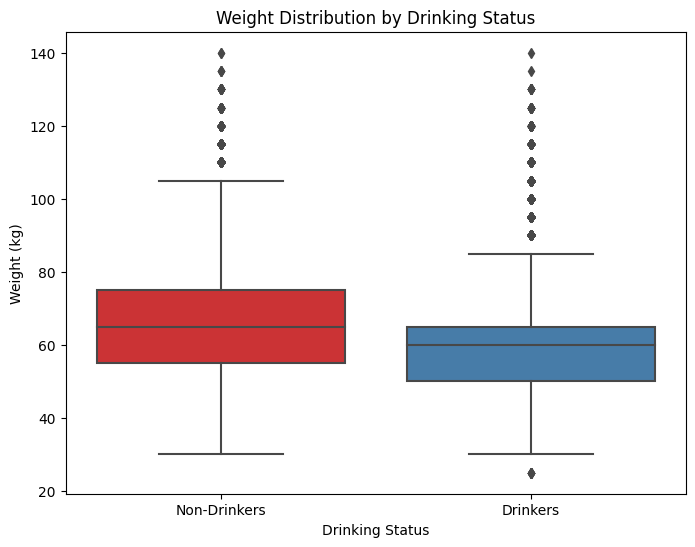

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DRK_YN', y='weight', palette='Set1')
plt.xlabel('Drinking Status')
plt.ylabel('Weight (kg)')
plt.title('Weight Distribution by Drinking Status')
plt.xticks(ticks=[0, 1], labels=['Non-Drinkers', 'Drinkers'])
plt.show()

The people who drink weigh more than others.

### **SBP and DBP Distribution by Smoking Status**

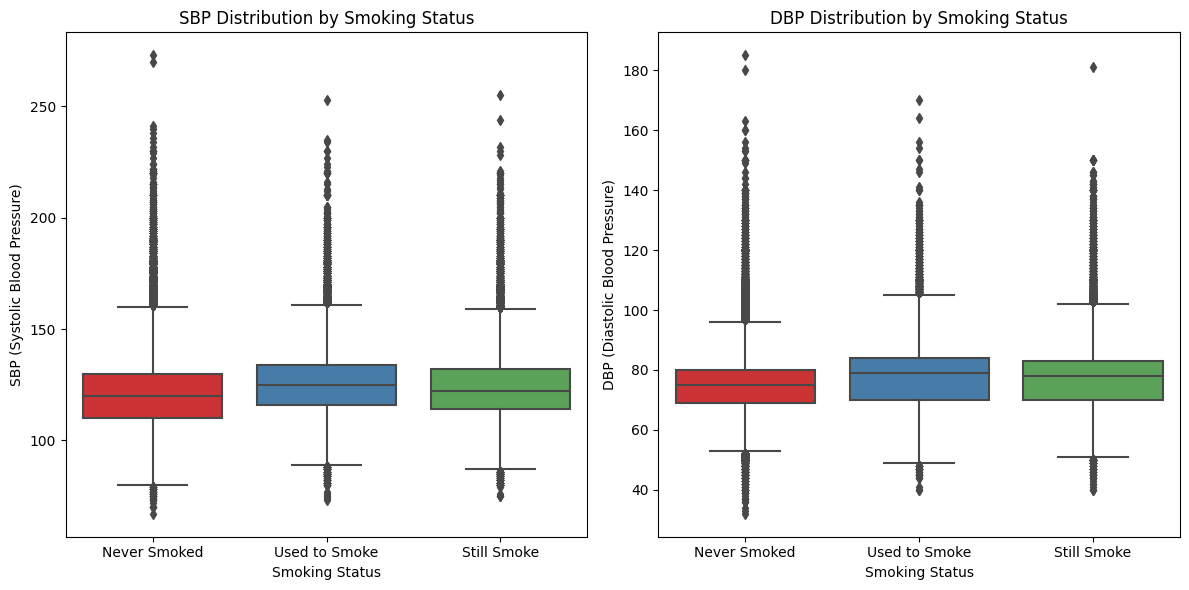

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='SMK_stat_type_cd', y='SBP', palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('SBP (Systolic Blood Pressure)')
plt.title('SBP Distribution by Smoking Status')
plt.xticks(ticks=[0, 1, 2], labels=['Never Smoked', 'Used to Smoke', 'Still Smoke'])

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='SMK_stat_type_cd', y='DBP', palette='Set1')
plt.xlabel('Smoking Status')
plt.ylabel('DBP (Diastolic Blood Pressure)')
plt.title('DBP Distribution by Smoking Status')
plt.xticks(ticks=[0, 1, 2], labels=['Never Smoked', 'Used to Smoke', 'Still Smoke'])

plt.tight_layout()
plt.show()

The SBP value is compartively higher for people who smoke.
There are no significant changes in DBP value.

### **SBP and DBP Distribution by Drinking Status**

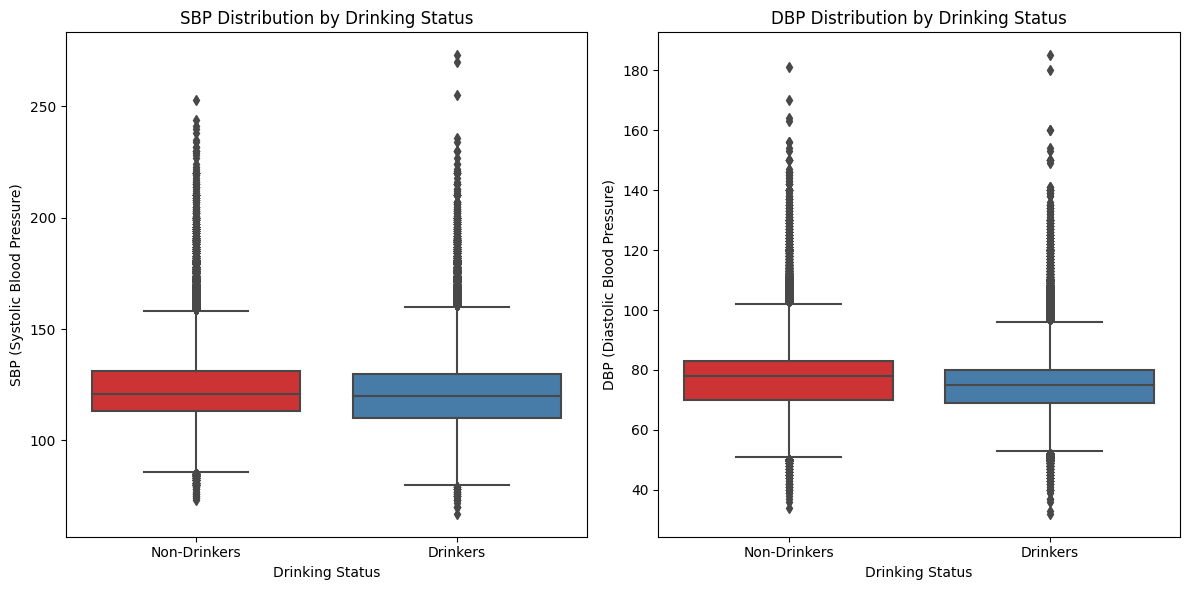

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='DRK_YN', y='SBP', palette='Set1')
plt.xlabel('Drinking Status')
plt.ylabel('SBP (Systolic Blood Pressure)')
plt.title('SBP Distribution by Drinking Status')
plt.xticks(ticks=[0, 1], labels=['Non-Drinkers', 'Drinkers'])

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='DRK_YN', y='DBP', palette='Set1')
plt.xlabel('Drinking Status')
plt.ylabel('DBP (Diastolic Blood Pressure)')
plt.title('DBP Distribution by Drinking Status')
plt.xticks(ticks=[0, 1], labels=['Non-Drinkers', 'Drinkers'])

plt.tight_layout()
plt.show()

SBP and DBP values are very similar for drinkers and non-drinkers.

### **Hemoglobin Level Distribution by Smoking Status**

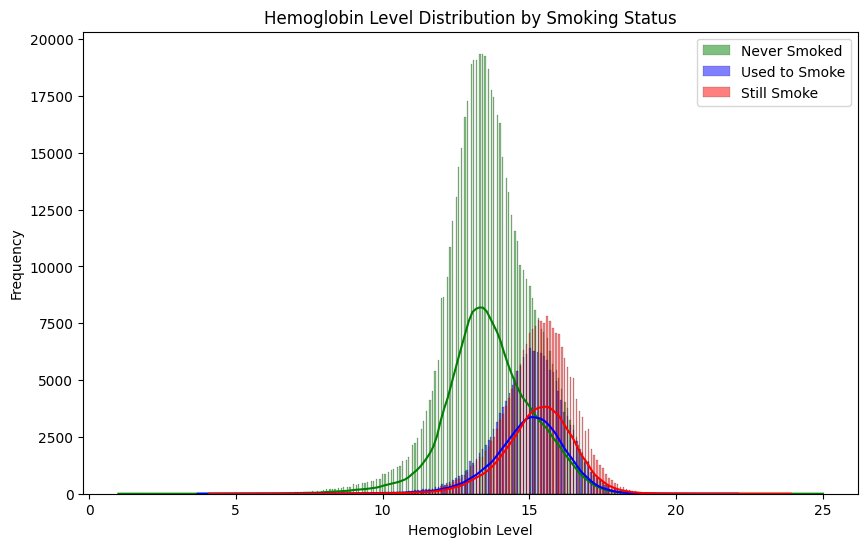

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(never_smoked['hemoglobin'], color='green', label='Never Smoked', kde=True)
sns.histplot(used_to_smoke['hemoglobin'], color='blue', label='Used to Smoke', kde=True)
sns.histplot(still_smoke['hemoglobin'], color='red', label='Still Smoke', kde=True)

plt.xlabel('Hemoglobin Level')
plt.ylabel('Frequency')
plt.title('Hemoglobin Level Distribution by Smoking Status')
plt.legend()
plt.show()

The hameglobin count of people who never smoke is usually
between 10 - 15. For the rest, the range is slightly higher.


### **Hemoglobin Level Distribution by Drinking Status**

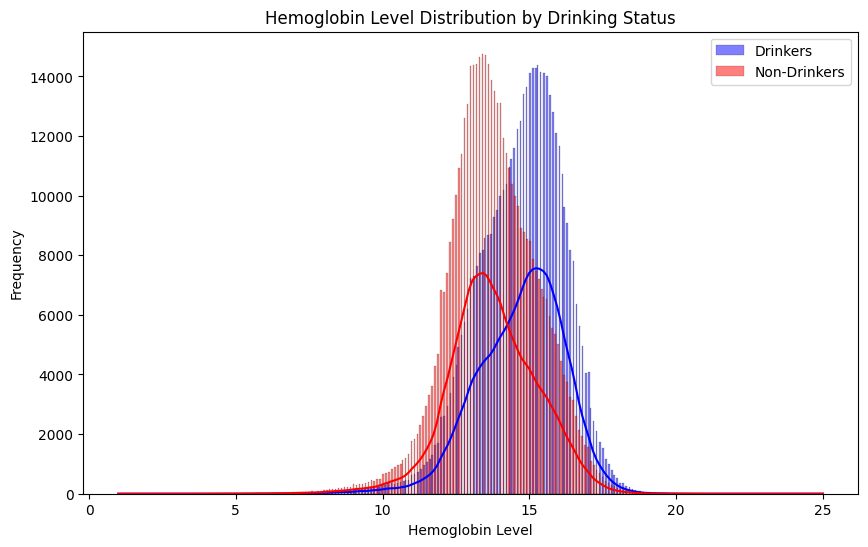

In [ ]:
plt.figure(figsize=(10, 6))

drinkers = df[df['DRK_YN'] == 'Y']
non_drinkers = df[df['DRK_YN'] == 'N']

sns.histplot(drinkers['hemoglobin'], color='blue', label='Drinkers', kde=True)
sns.histplot(non_drinkers['hemoglobin'], color='red', label='Non-Drinkers', kde=True)

plt.xlabel('Hemoglobin Level')
plt.ylabel('Frequency')
plt.title('Hemoglobin Level Distribution by Drinking Status')
plt.legend()
plt.show()

The hameglobin count of people who drink is usually
higher than people who dont.

### **Cholesterol levels (specifically HDL_chole) for different smoking status groups**

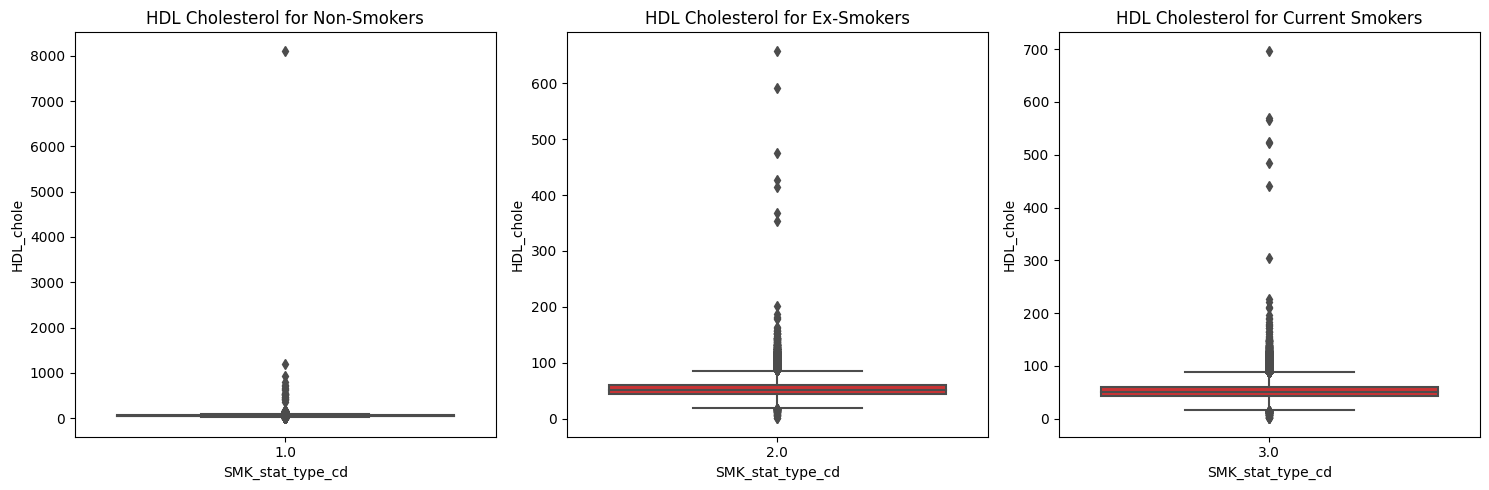

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=never_smoked, x='SMK_stat_type_cd', y='HDL_chole', palette='Set1', ax=axes[0])
axes[0].set_title('HDL Cholesterol for Non-Smokers')

sns.boxplot(data=used_to_smoke, x='SMK_stat_type_cd', y='HDL_chole', palette='Set1', ax=axes[1])
axes[1].set_title('HDL Cholesterol for Ex-Smokers')

sns.boxplot(data=still_smoke, x='SMK_stat_type_cd', y='HDL_chole', palette='Set1', ax=axes[2])
axes[2].set_title('HDL Cholesterol for Current Smokers')

plt.tight_layout()
plt.show()

The HDL cholesterol level of people who smoke is compartively very high.

### **Cholesterol levels (specifically HDL_chole) for drinking status**

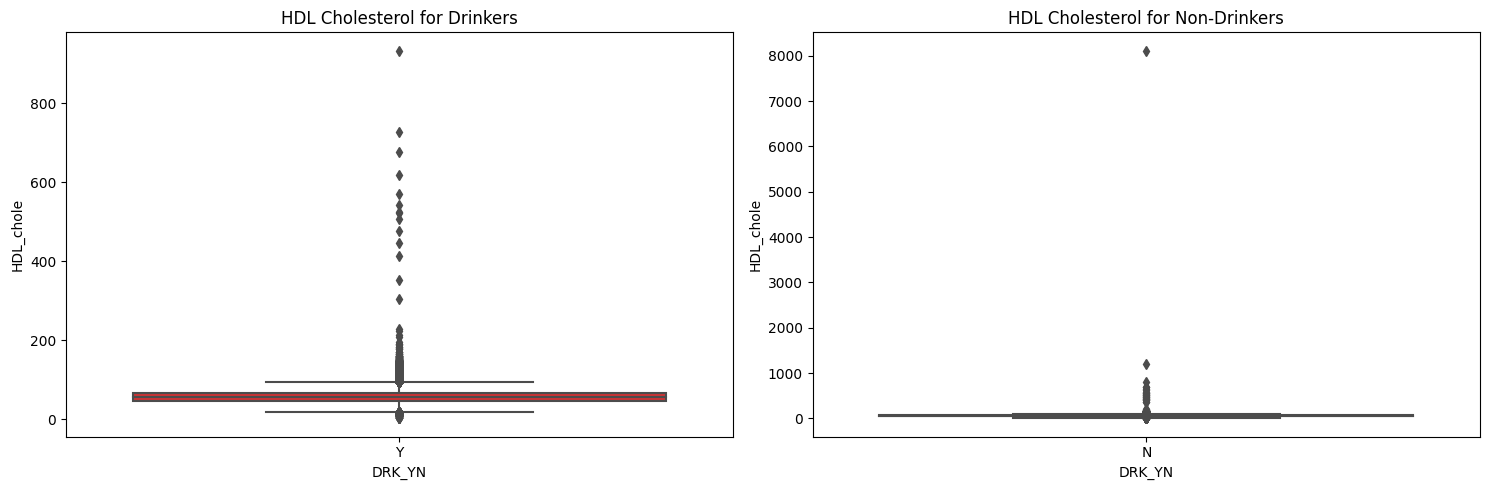

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=drinkers, x='DRK_YN', y='HDL_chole', palette='Set1', ax=axes[0])
axes[0].set_title('HDL Cholesterol for Drinkers')

sns.boxplot(data=non_drinkers, x='DRK_YN', y='HDL_chole', palette='Set1', ax=axes[1])
axes[1].set_title('HDL Cholesterol for Non-Drinkers')

plt.tight_layout()
plt.show()

The HDL cholesterol level of people who drink is compartively very high.

### **Cholesterol levels (specifically LDL_chole) for different smoking status groups**

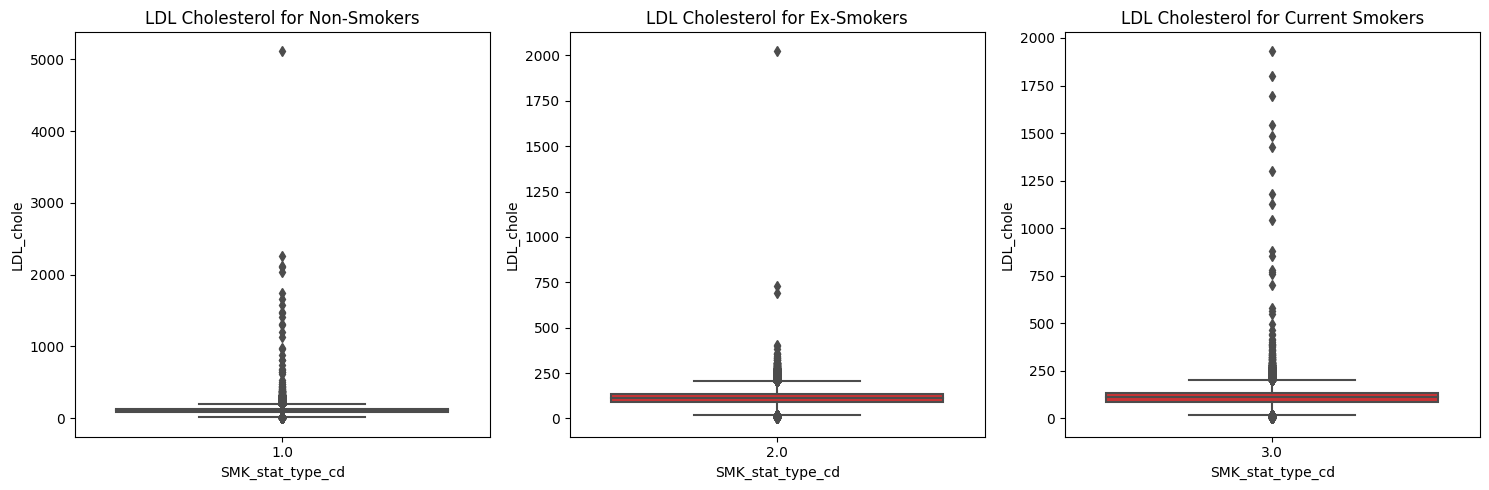

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=never_smoked, x='SMK_stat_type_cd', y='LDL_chole', palette='Set1', ax=axes[0])
axes[0].set_title('LDL Cholesterol for Non-Smokers')

sns.boxplot(data=used_to_smoke, x='SMK_stat_type_cd', y='LDL_chole', palette='Set1', ax=axes[1])
axes[1].set_title('LDL Cholesterol for Ex-Smokers')

sns.boxplot(data=still_smoke, x='SMK_stat_type_cd', y='LDL_chole', palette='Set1', ax=axes[2])
axes[2].set_title('LDL Cholesterol for Current Smokers')

plt.tight_layout()
plt.show()

The LDL cholesterol level of people who smoke is compartively very high.

### **Cholesterol levels (specifically LDL_chole) for drinking status**

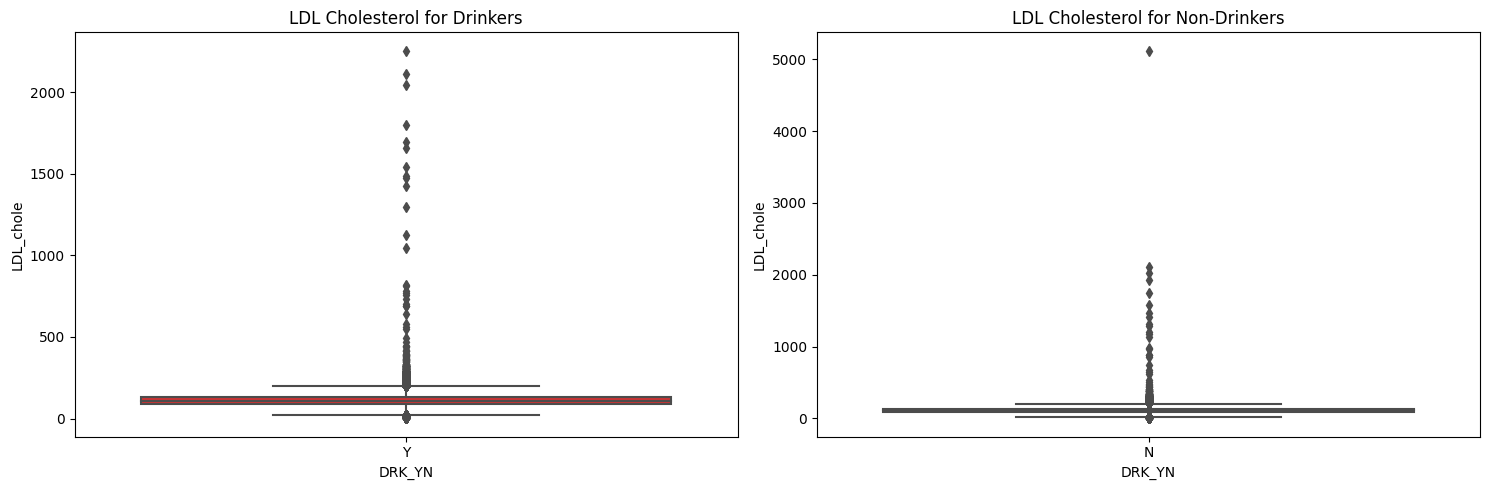

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=drinkers, x='DRK_YN', y='LDL_chole', palette='Set1', ax=axes[0])
axes[0].set_title('LDL Cholesterol for Drinkers')

sns.boxplot(data=non_drinkers, x='DRK_YN', y='LDL_chole', palette='Set1', ax=axes[1])
axes[1].set_title('LDL Cholesterol for Non-Drinkers')

plt.tight_layout()
plt.show()

The LDL cholesterol level of people who drink is compartively very high.

In [ ]:
# dropping the created column
df=df.drop('age_group',axis=1)

# **Classification problems**

### **TASK 1 : Predicting Smoking Status**






*  In this classification problem , we can predict a person's
smoking status . The target variable represents the smoking state (1(never), 2(used to smoke but quit), 3(still smoke))

### **TASK 2 : Predicting Drinking Status**


*   In this classification problem , we can predict a person's drinking status. The target variable, DRK_YN, represents whether an individual is a drinker ("Y") or a non-drinker ("N").

# **Preprocessing**

### **Encoding Variables**

In [ ]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['DRK_YN'] = label_encoder.fit_transform(df['DRK_YN'])

### **Dropping Duplicates**

In [ ]:
df = df.drop_duplicates()
print(df.shape)

(991320, 24)


# **Correlation Analysis**

Text(0.5, 1.0, 'Correlation Heatmap')

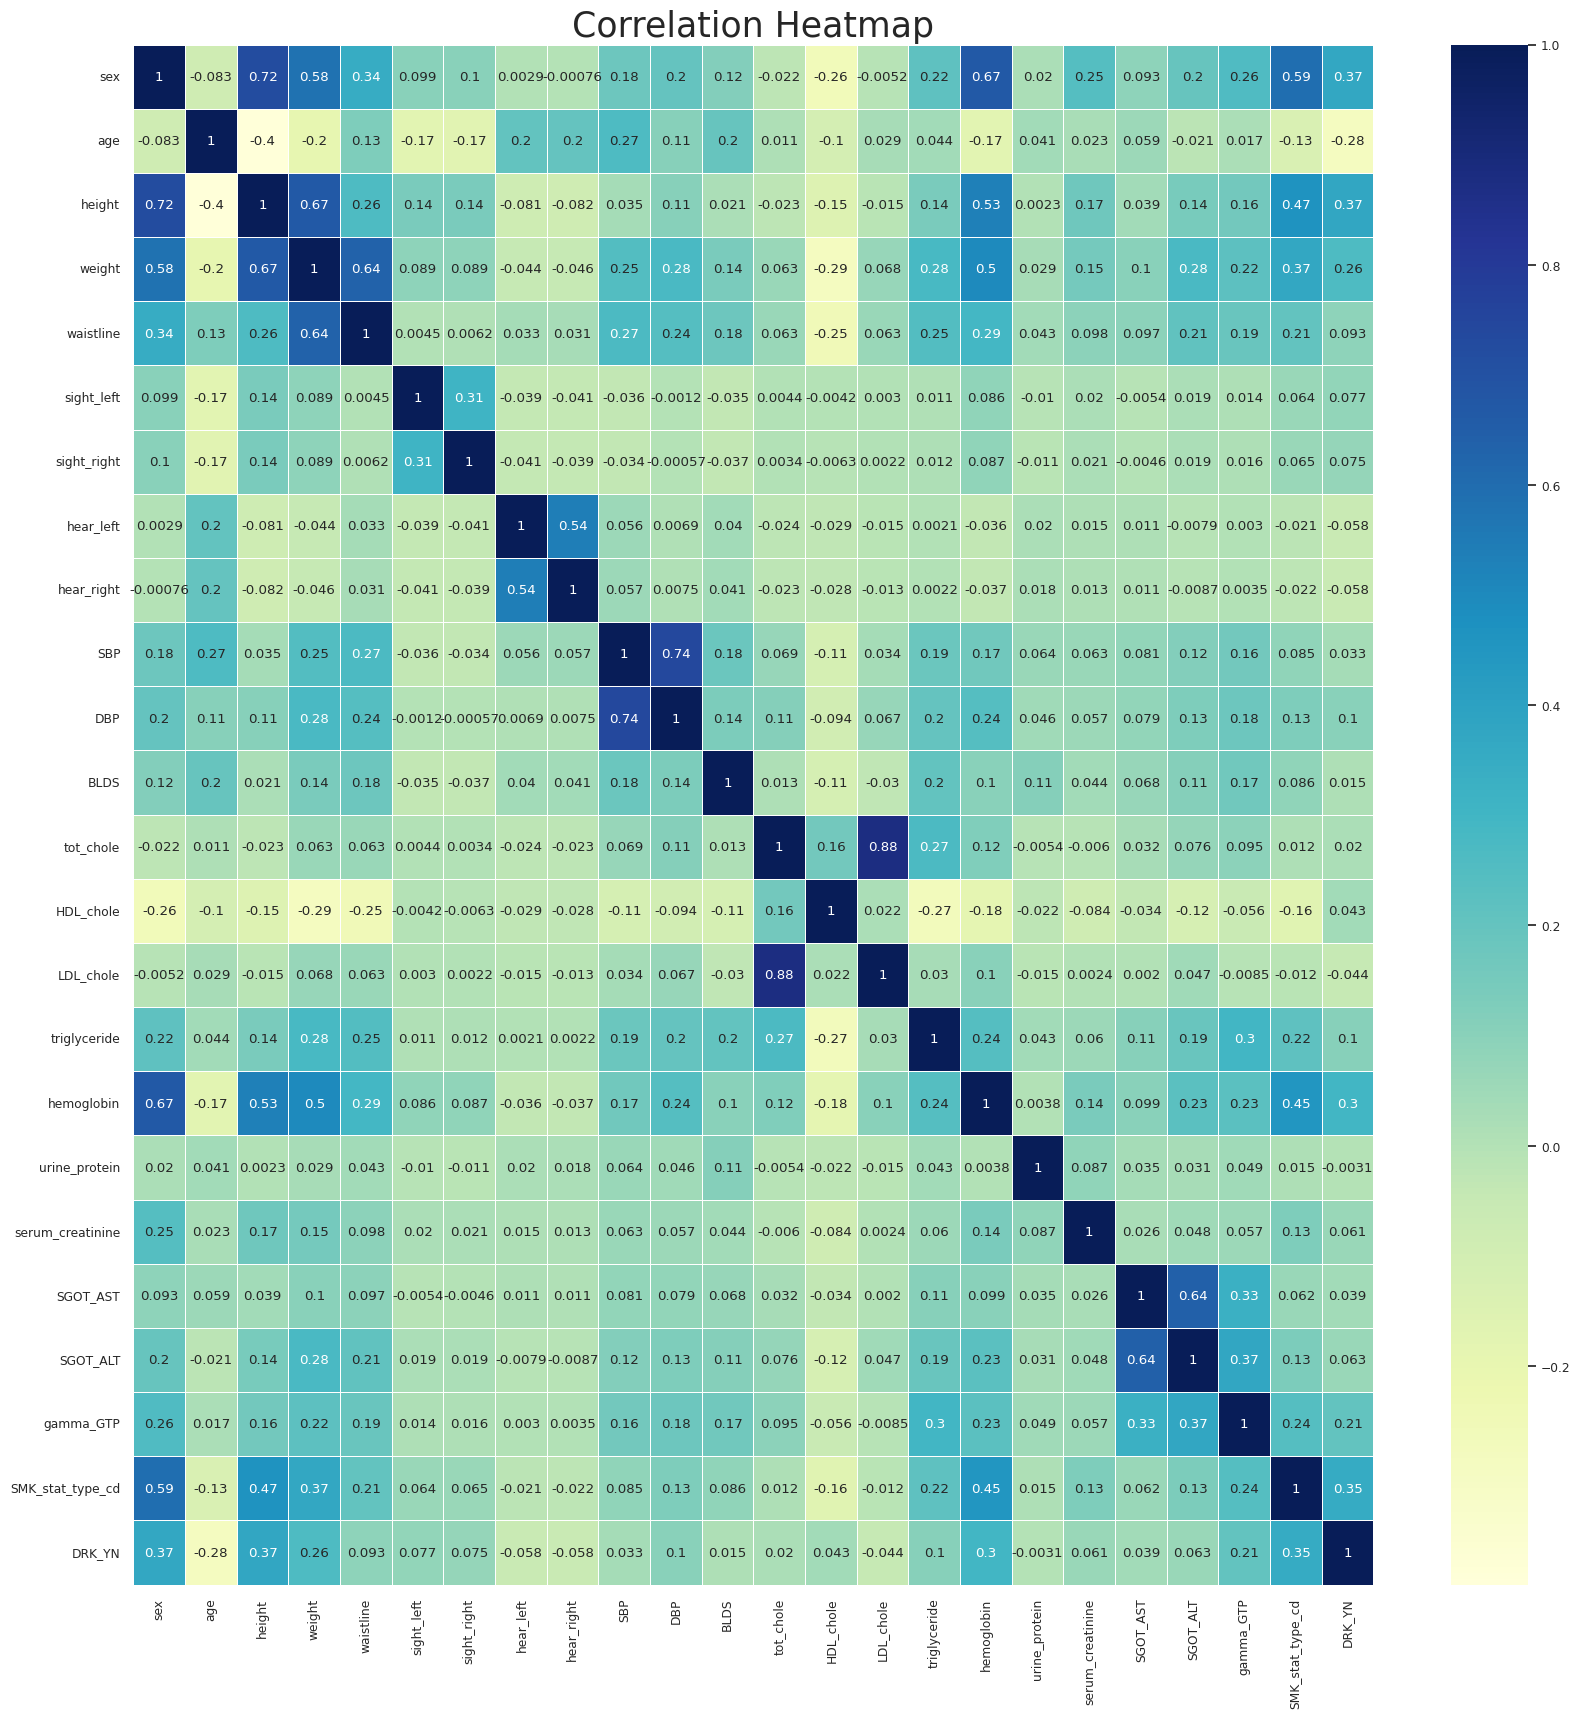

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize = (20,20))
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu',linewidths=0.5)
plt.title('Correlation Heatmap',fontsize = 25)

# **Using all features**

## **Task 1 Implementation**

In [ ]:
X = df.drop(columns=['SMK_stat_type_cd'])
y = df['SMK_stat_type_cd']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

dt_report = classification_report(y_test, dt_y_pred)
print("Decision Tree Classifier:")
print("Classification Report:")
print(dt_report)

Decision Tree Classifier:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      0.78      0.78    120527
         2.0       0.33      0.34      0.34     35087
         3.0       0.41      0.42      0.41     42650

    accuracy                           0.62    198264
   macro avg       0.51      0.51      0.51    198264
weighted avg       0.63      0.62      0.62    198264



### **Logistic Regression Classifier**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_y_pred = lr_model.predict(X_test_scaled)

lr_report = classification_report(y_test, lr_y_pred)
print("Logistic Regression Classifier:")
print("Classification Report:")
print(lr_report)

Logistic Regression Classifier:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.82      0.84      0.83    120527
         2.0       0.46      0.32      0.38     35087
         3.0       0.50      0.59      0.54     42650

    accuracy                           0.69    198264
   macro avg       0.59      0.58      0.58    198264
weighted avg       0.69      0.69      0.69    198264



## **Task 2 Implementation**

In [ ]:
X = df.drop(columns=['DRK_YN'])
y = df['DRK_YN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

dt_report = classification_report(y_test, dt_y_pred)
print("Decision Tree Classifier:")
print("Classification Report:")
print(dt_report)

Decision Tree Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65     99512
           1       0.64      0.65      0.65     98752

    accuracy                           0.65    198264
   macro avg       0.65      0.65      0.65    198264
weighted avg       0.65      0.65      0.65    198264



### **Logistic Regression Classifier**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_y_pred = lr_model.predict(X_test_scaled)

lr_report = classification_report(y_test, lr_y_pred)
print("Logistic Regression Classifier:")
print("Classification Report:")
print(lr_report)

Logistic Regression Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     99512
           1       0.73      0.72      0.72     98752

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



### **Support Vector Classifier**

In [ ]:
svc_model = svm.LinearSVC(max_iter=1000)
svc_model.fit(X_train_scaled, y_train)
y_pred_svc = svc_model.predict(X_test_scaled)

svc_report = classification_report(y_test, y_pred_svc)
print("SVC:")
print("Classification Report:")
print(svc_report)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC:
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     99512
           1       0.73      0.72      0.72     98752

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



# **Using Correlated Features**

## **Task 1 Implementation**

In [ ]:
correlation_threshold = 0.1
SMK_features = []
for feature in corr_matrix.columns:
    if feature != 'SMK_stat_type_cd' and (corr_matrix[feature]['SMK_stat_type_cd'] > correlation_threshold or
                                corr_matrix[feature]['SMK_stat_type_cd'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with SMK_stat_type_cd:")
print(SMK_features)

Correlated features with SMK_stat_type_cd:
['sex', 'age', 'height', 'weight', 'waistline', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'DRK_YN']


In [ ]:
x=df[SMK_features]
y=df["SMK_stat_type_cd"]

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

### **Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)

dt_report = classification_report(y_test, dt_y_pred)
print("Decision Tree Classifier:")
print("Classification Report:")
print(dt_report)

Decision Tree Classifier:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      0.78      0.78    120647
         2.0       0.33      0.34      0.34     34951
         3.0       0.41      0.42      0.41     42666

    accuracy                           0.62    198264
   macro avg       0.51      0.51      0.51    198264
weighted avg       0.63      0.62      0.62    198264



### **Random Forest Classifier**

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_y_pred = rf_model.predict(x_test)

rf_report = classification_report(y_test, rf_y_pred)
print("Random Forest Classifier:")
print("Classification Report:")
print(rf_report)

Random Forest Classifier:
Classification Report:
              precision    recall  f1-score   support

         1.0       0.82      0.85      0.83    120647
         2.0       0.44      0.36      0.40     34951
         3.0       0.52      0.56      0.54     42666

    accuracy                           0.70    198264
   macro avg       0.60      0.59      0.59    198264
weighted avg       0.69      0.70      0.69    198264



In [ ]:
feature_importances = rf_model.feature_importances_
importance_dict = dict(zip(x_train.columns, feature_importances))
importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")

sex: 0.13997743421842831
hemoglobin: 0.10245370411796707
gamma_GTP: 0.09569254594278516
triglyceride: 0.09314115064430825
HDL_chole: 0.07997465394804652
waistline: 0.07924363622533151
height: 0.07862658852086629
SGOT_ALT: 0.07788989235037243
DBP: 0.07314847833721409
serum_creatinine: 0.052838296371234654
weight: 0.051797138193351834
age: 0.050247297557813514
DRK_YN: 0.024969183572280274


### **Hyperparameter tuning for Random Forest model**

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
}

rf_gs=GridSearchCV(RandomForestClassifier(),
                     param_grid,
                     n_jobs=-1,
                      cv=2,
                    verbose=True)

rf_gs.fit(x_train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=True)

In [ ]:
best_params = rf_gs.best_params_
best_score = rf_gs.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7009366299479481


In [ ]:
y_pred = rf_gs.predict(x_test)
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

         1.0       0.82      0.86      0.84    120647
         2.0       0.47      0.29      0.36     34951
         3.0       0.51      0.59      0.55     42666

    accuracy                           0.70    198264
   macro avg       0.60      0.58      0.58    198264
weighted avg       0.69      0.70      0.69    198264



## **Task 2 Implementation**

In [ ]:
correlation_threshold = 0.1
DRK_features = []
for feature in corr_matrix.columns:
    if feature != 'DRK_YN' and (corr_matrix[feature]['DRK_YN'] > correlation_threshold or
                                corr_matrix[feature]['DRK_YN'] < -correlation_threshold):
        DRK_features.append(feature)

print("Correlated features with 'DRK_YN':")
print(DRK_features)

Correlated features with 'DRK_YN':
['sex', 'age', 'height', 'weight', 'DBP', 'triglyceride', 'hemoglobin', 'gamma_GTP', 'SMK_stat_type_cd']


In [ ]:
x=df[DRK_features]
y=df["DRK_YN"]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

### **Support Vector Classifier**

In [ ]:
svc_model = svm.LinearSVC(max_iter=1000)
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_test)

svc_report = classification_report(y_test, y_pred_svc)
print("SVC:")
print("Classification Report:")
print(svc_report)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.01      0.01     99147
           1       0.50      1.00      0.67     99117

    accuracy                           0.50    198264
   macro avg       0.73      0.50      0.34    198264
weighted avg       0.73      0.50      0.34    198264



### **Random Forest Classifier**

In [ ]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)

rfc_report = classification_report(y_test, y_pred_rf)
print("Random Forest Classifier:")
print("Classification Report:")
print(rfc_report)

Random Forest Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     99340
           1       0.70      0.72      0.71     98924

    accuracy                           0.71    198264
   macro avg       0.71      0.71      0.71    198264
weighted avg       0.71      0.71      0.71    198264



In [ ]:
feature_importances = rf_model.feature_importances_
importance_dict = dict(zip(x_train.columns, feature_importances))
importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")

triglyceride: 0.19336338495511296
hemoglobin: 0.1618555207761581
gamma_GTP: 0.14944673406034917
DBP: 0.13640381315393366
age: 0.0903925168926926
height: 0.0795945395824903
weight: 0.07393717337675412
SMK_stat_type_cd: 0.05987628078431083
sex: 0.05513003641819827


### **Logistic Regression**

In [ ]:
lr_model = LogisticRegression(max_iter=1000, fit_intercept=False)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

lr_report = classification_report(y_test, y_pred_lr)
print("Decision Tree Classifier:")
print("Classification Report:")
print(lr_report)

Decision Tree Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72     99340
           1       0.72      0.70      0.71     98924

    accuracy                           0.71    198264
   macro avg       0.71      0.71      0.71    198264
weighted avg       0.71      0.71      0.71    198264



### **Hyperparameter tuning for Logistic Regression model**

In [ ]:
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

lrg_gs=GridSearchCV(LogisticRegression(),
                     log_reg_grid,
                      cv=5,
                    verbose=True)
lrg_gs.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
best_params = lrg_gs.best_params_
best_score = lrg_gs.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.0006723357536499335, 'solver': 'liblinear'}
Best Score: 0.713243451861582


In [ ]:
y_pred = lrg_gs.predict(x_test)
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     99147
           1       0.72      0.70      0.71     99117

    accuracy                           0.71    198264
   macro avg       0.71      0.71      0.71    198264
weighted avg       0.71      0.71      0.71    198264



# **Conclusion**

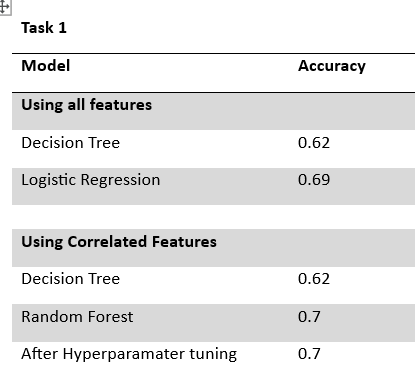

Using either logistic regression or Random forest , accuracy of 70 % can be achieved for predicting smoking status.

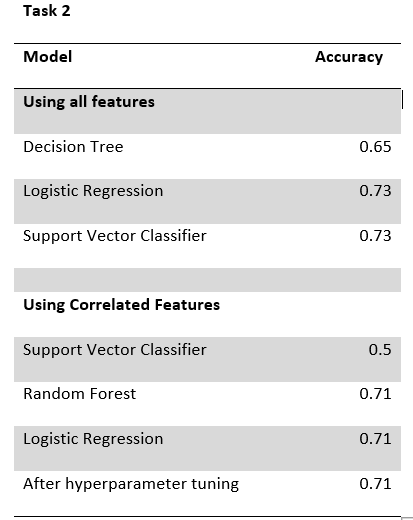

Using either logistic regression or SVC , accuracy of 73 % can be achieved for predicting drinking status.